In [111]:
import numpy as np
from matplotlib import pyplot as plt

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


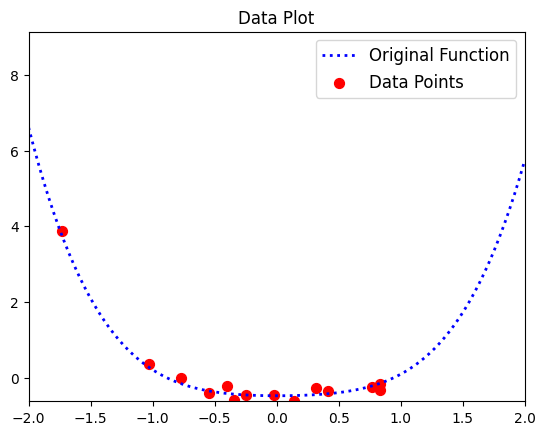

In [112]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

In [113]:
degree = 4
A = np.zeros((n_data, degree+1))

x=[x_data]
V = [xi**i for i in range(degree+1) for xi in x]
A=np.transpose(V)

In [114]:
print(A)

[[ 1.00000000e+00  7.69458258e-01  5.92066011e-01  4.55570081e-01
   3.50542161e-01]
 [ 1.00000000e+00 -5.48726825e-01  3.01101129e-01 -1.65222266e-01
   9.06618896e-02]
 [ 1.00000000e+00 -3.96088994e-01  1.56886491e-01 -6.21410124e-02
   2.46133711e-02]
 [ 1.00000000e+00 -3.44457358e-01  1.18650871e-01 -4.08701656e-02
   1.40780292e-02]
 [ 1.00000000e+00 -1.73259726e+00  3.00189326e+00 -5.20107204e+00
   9.01136317e+00]
 [ 1.00000000e+00 -1.02635747e+00  1.05340965e+00 -1.08117486e+00
   1.10967189e+00]
 [ 1.00000000e+00  8.31832735e-01  6.91945699e-01  5.75583083e-01
   4.78788850e-01]
 [ 1.00000000e+00  4.18095727e-01  1.74804037e-01  7.30848209e-02
   3.05564513e-02]
 [ 1.00000000e+00 -7.73450895e-01  5.98226287e-01 -4.62698657e-01
   3.57874691e-01]
 [ 1.00000000e+00  1.41388300e-01  1.99906515e-02  2.82644423e-03
   3.99626146e-04]
 [ 1.00000000e+00  3.16614871e-01  1.00244977e-01  3.17390503e-02
   1.00490553e-02]
 [ 1.00000000e+00  8.32089704e-01  6.92373276e-01  5.76116675e-01

In [115]:
w_est = np.zeros((degree+1,1))
y_est = np.zeros_like(x_list)

Ainv = np.linalg.pinv(A)

w_est=Ainv@y_data

for i in range(len(x_list)):
    y_est[i] =  w_est[0] + w_est[1]*x_list[i] +w_est[2]*x_list[i]**2 + w_est[3]*x_list[i]**3 + w_est[4]*x_list[i]**4

y_est

array([ 6.65394358e+00,  6.17255641e+00,  5.71613603e+00,  5.28379198e+00,
        4.87465043e+00,  4.48785424e+00,  4.12256291e+00,  3.77795260e+00,
        3.45321614e+00,  3.14756299e+00,  2.86021931e+00,  2.59042788e+00,
        2.33744816e+00,  2.10055626e+00,  1.87904494e+00,  1.67222363e+00,
        1.47941842e+00,  1.29997206e+00,  1.13324393e+00,  9.78610097e-01,
        8.35463283e-01,  7.03212860e-01,  5.81284860e-01,  4.69121975e-01,
        3.66183552e-01,  2.71945599e-01,  1.85900780e-01,  1.07558418e-01,
        3.64444947e-02, -2.78983522e-02, -8.59108254e-02, -1.38016970e-01,
       -1.84624174e-01, -2.26123166e-01, -2.62888016e-01, -2.95276139e-01,
       -3.23628289e-01, -3.48268564e-01, -3.69504403e-01, -3.87626586e-01,
       -4.02909237e-01, -4.15609821e-01, -4.25969145e-01, -4.34211358e-01,
       -4.40543951e-01, -4.45157757e-01, -4.48226952e-01, -4.49909051e-01,
       -4.50344916e-01, -4.49658745e-01, -4.47958083e-01, -4.45333814e-01,
       -4.41860165e-01, -

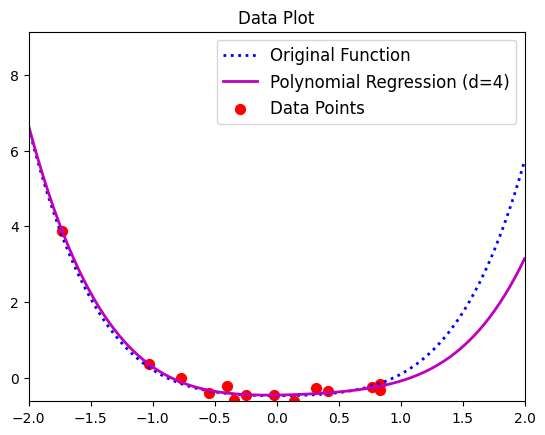

In [116]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

In [117]:
degree1 = 1
A1 = np.zeros((n_data, degree1+1)) 
x=[x_data]
V1 = [xi**i for i in range(degree1+1) for xi in x]
A1=np.transpose(V1)
w_est1 = np.zeros((degree1+1,1))
y_est1 = np.zeros_like(x_list)

Ainv1 = np.linalg.pinv(A1)

w_est1=Ainv1@y_data

for i in range(len(x_list)):
    y_est1[i] =  w_est1[0] + w_est1[1]*x_list[i]

y_est1

array([ 4.44127600e+00,  4.35240169e+00,  4.26352738e+00,  4.17465307e+00,
        4.08577876e+00,  3.99690445e+00,  3.90803014e+00,  3.81915583e+00,
        3.73028152e+00,  3.64140721e+00,  3.55253290e+00,  3.46365859e+00,
        3.37478427e+00,  3.28590996e+00,  3.19703565e+00,  3.10816134e+00,
        3.01928703e+00,  2.93041272e+00,  2.84153841e+00,  2.75266410e+00,
        2.66378979e+00,  2.57491548e+00,  2.48604117e+00,  2.39716686e+00,
        2.30829255e+00,  2.21941824e+00,  2.13054393e+00,  2.04166962e+00,
        1.95279531e+00,  1.86392100e+00,  1.77504669e+00,  1.68617238e+00,
        1.59729807e+00,  1.50842376e+00,  1.41954945e+00,  1.33067514e+00,
        1.24180083e+00,  1.15292652e+00,  1.06405221e+00,  9.75177895e-01,
        8.86303584e-01,  7.97429274e-01,  7.08554964e-01,  6.19680653e-01,
        5.30806343e-01,  4.41932032e-01,  3.53057722e-01,  2.64183412e-01,
        1.75309101e-01,  8.64347910e-02, -2.43951938e-03, -9.13138298e-02,
       -1.80188140e-01, -

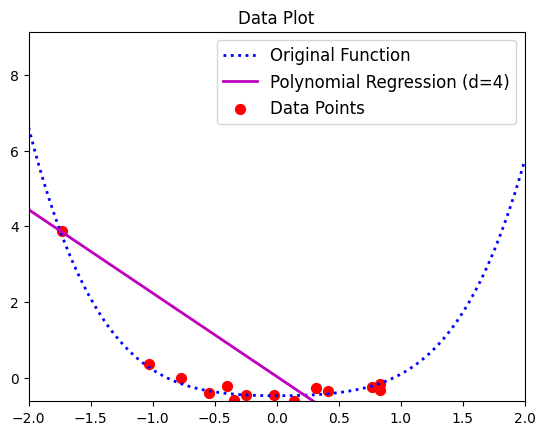

In [121]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

In [119]:
degree2 = 10
A2 = np.zeros((n_data, degree2+1)) 
x=[x_data]
V2 = [xi**i for i in range(degree2+1) for xi in x]
A2=np.transpose(V2)
w_est2 = np.zeros((degree2+1,1))
y_est2 = np.zeros_like(x_list)

Ainv2 = np.linalg.pinv(A2)

w_est2=Ainv2@y_data

for i in range(len(x_list)):
    y_est2[i] =  w_est2[0]+ w_est2[1]*x_list[i] +w_est2[2]*x_list[i]**2 + w_est2[3]*x_list[i]**3 + w_est2[4]*x_list[i]**4 + w_est2[5]*x_list[i]**5 + w_est2[6]*x_list[i]**6+ w_est2[7]*x_list[i]**7+ w_est2[8]*x_list[i]**8+ w_est2[9]*x_list[i]**9+ w_est2[10]*x_list[i]**10
    
y_est2

array([ 4.73698776e+01,  4.13037262e+01,  3.39287626e+01,  2.62381610e+01,
        1.89009405e+01,  1.23350341e+01,  6.76806818e+00,  2.28739501e+00,
       -1.11921240e+00, -3.53092983e+00, -5.06816326e+00, -5.87270603e+00,
       -6.09284392e+00, -5.87258130e+00, -5.34425556e+00, -4.62389455e+00,
       -3.80875265e+00, -2.97653564e+00, -2.18589323e+00, -1.47782094e+00,
       -8.77670260e-01, -3.97517916e-01, -3.86917756e-02,  2.05706938e-01,
        3.48408393e-01,  4.05796176e-01,  3.96008271e-01,  3.37353962e-01,
        2.47062659e-01,  1.40363155e-01,  2.98776278e-02, -7.46964939e-02,
       -1.66652033e-01, -2.42125962e-01, -2.99786172e-01, -3.40396911e-01,
       -3.66308141e-01, -3.80911834e-01, -3.88104610e-01, -3.91791258e-01,
       -3.95457920e-01, -4.01837144e-01, -4.12680002e-01, -4.28643150e-01,
       -4.49291347e-01, -4.73208784e-01, -4.98205821e-01, -5.21601624e-01,
       -5.40557970e-01, -5.52435354e-01, -5.55139764e-01, -5.47427268e-01,
       -5.29134131e-01, -

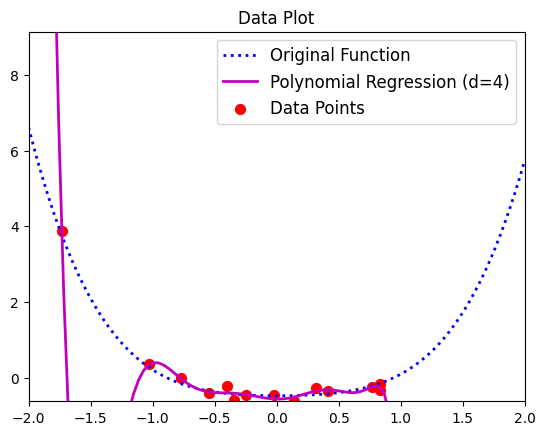

In [120]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

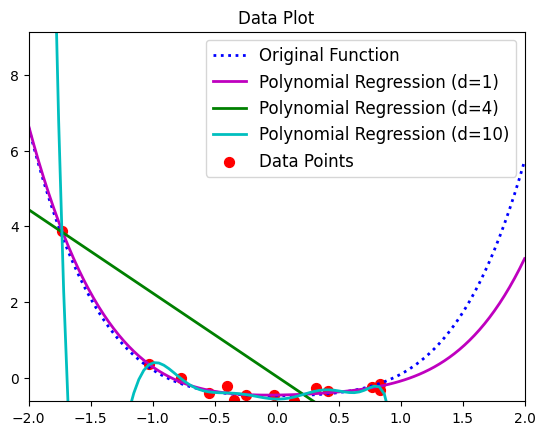

In [122]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

In [ ]:
고차다항회귀분석을 하면 모든 데이터값과 회귀선의 오차가 매우적으며 대부분 해당 값을 정확하게 지나는 그래프를 가진다는 것이 장점이다. 
하지만 지나치게 차수를 높이면 모든 데이터 값의 오차를 줄이려는 경향이 있어 과하게 벗어나는 부분이 생기기도 한다.
즉, 예측을 하는 것이 아니라 데이터 포인트를 따라잡으려는 성질이 커진다는 것이 단점이다.

In [ ]:
저차다항회귀분석을 하면 데이터의 분포를 매우 간단한 꼴로 나타낸다. 
다만 데이터가 넓게 분포하는 경우 회귀선과 데이터의 오차가 커 부정확한 예측을 하는 경우가 많다는 점이 단점이다.

In [ ]:
머신러닝에서 과하게 모든 데이터에 의존하려는 현상을 과적합이라고 한다. 